In [1]:
#Imports
import numpy as np
import h5py as h5
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.integrate import nquad
from scipy.special import ellipe
from scipy.special import ellipk

#Settings
#np.seterr(over='ignore') #Ignore overflow runtime warnings while I resolve others
options={'limit':100} #Set maximum number of subdivisions to 100 instead of 50.

In [2]:
#Set Parameters

#Constants for Galaxy NGC 5533
G = 4.300e-6                                                #gravitational constant (kpc/solar mass*(km/s)^2)
h = 8.9                                                     #radial scale-length (kpc)
rho00 = 0.31e9                                              #prefactor that will cancel #central density
epsdisk = 5.0                                               #from Noordermeer's paper
absmag = -22.02                                             #absolute magnitude 
magsun = 4.42                                               #absolute magnitude of the sun
z0 = 0.2*h                                                  #half-thickness (kpc)
R = 4*h                                                     #cut-off radius (kpc)
d = 0.2*h                                                   #cut-off length upper limits (kpc)
L0 = np.power(10, (0.4*(magsun-absmag)))                    #Absolute Magnitude to luminosity

#Define Initial Functions
def x(r,u,xi):
    return ((r**2)+(u**2)+(xi**2))/(2*r*u)
def px(r,u,xi):
    return x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))

#Define Variables
ra = np.linspace(0.1, 125, 500)

At r=6.339[kpc]: 152067592.03860623
At r=6.342[kpc]: 152016341.9378595


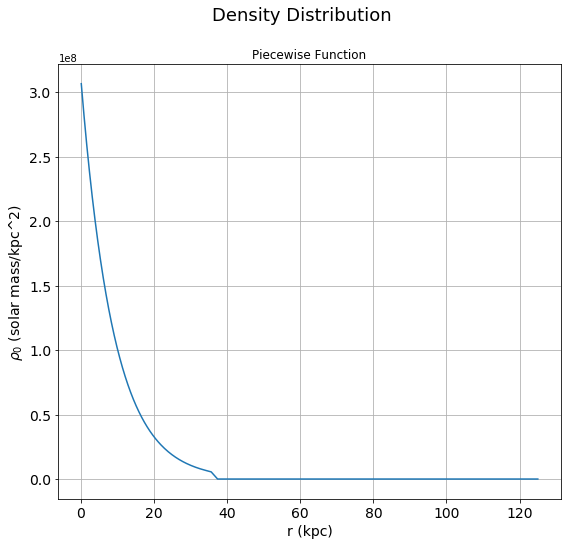

In [3]:
#Piecewise Function

def rho0(r, R, h, d):                                       #density piecewise function
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-((r-R)/d)), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

# Plotting
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho0(ra, R, h, d), linestyle='solid', label='$\\rho_0$(r)')          

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('$\\rho_0$ (solar mass/kpc^2)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

#Print desired values
print("At r=6.339[kpc]:",rho0(6.339, R, h, d))
print("At r=6.342[kpc]:",rho0(6.342, R, h, d))

At r=6.339[kpc]: -17086246.296472605
At r=6.342[kpc] -17080487.858186457


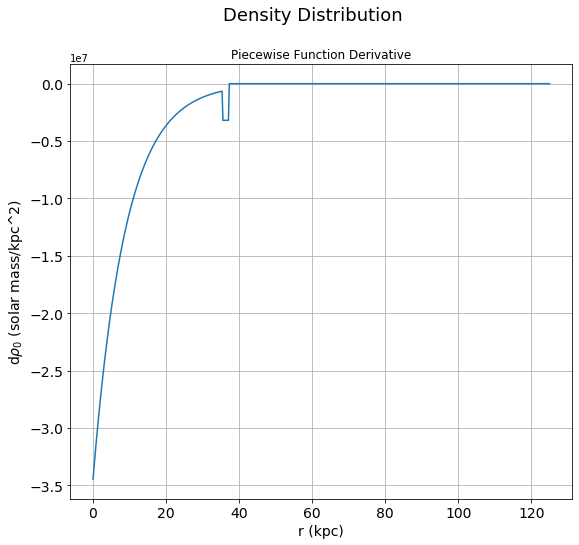

In [4]:
#Piecewise Function Derivative

def durho0(r, R, h, d):                                     #partial derivative of rho(u,xi)
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

#Plotting
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, durho0(ra, R, h, d), linestyle='solid', label='d$\\rho_0$(r)')          

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel ('d$\\rho_0$ (solar mass/kpc^2)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

#Print Desired Values
print("At r=6.339[kpc]:",durho0(6.339, R, h, d))
print("At r=6.342[kpc]",durho0(6.342, R, h, d))

Function at r=6.339[kpc]: 152067592.03860623
Function at r=6.342[kpc]: 152016341.9378595
Derivative at r=6.339[kpc]: -17086246.296472605
Derivative at r=6.342[kpc]: -17080487.858186457


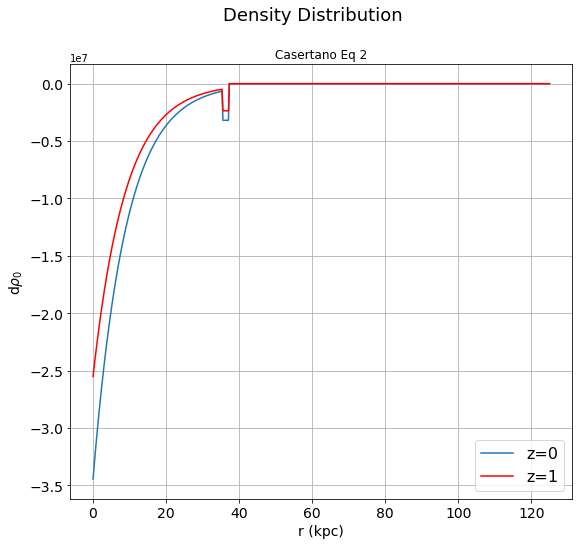

In [5]:
#Disk Density Distribution
rho_rz = lambda r,z: rho0(r, R, h, d)*(np.power((np.cosh(z/z0)), (-2)))
drho_rz = lambda r,z: durho0(r, R, h, d)*(np.power(np.cosh(z/z0), -2))

#Plotting
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

#plt.plot(ra, rho_rz(ra,0), linestyle='solid', label='z=0')          
#plt.plot(ra, rho_rz(ra,1), linestyle='solid', label='z=1', color='r')
plt.plot(ra, drho_rz(ra,0), linestyle='solid', label='z=0')          
plt.plot(ra, drho_rz(ra,1), linestyle='solid', label='z=1', color='r')

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Casertano Eq 2')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);
plt.legend(fontsize=16);                                   #adding legend

#Print Desired Values
print("Function at r=6.339[kpc]:",rho_rz(6.339,0))
print("Function at r=6.342[kpc]:",rho_rz(6.342,0))
print("Derivative at r=6.339[kpc]:",drho_rz(6.339,0))
print("Derivative at r=6.342[kpc]:",drho_rz(6.342,0))

At RA=ZA=2: 85627549.80849361


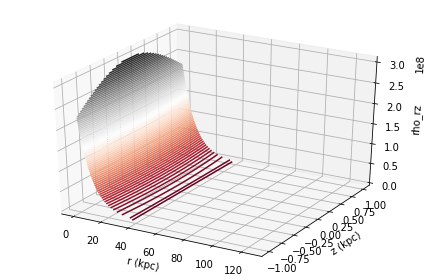

In [6]:
#Disk Density Distribution (3D)
def rho_rz2(r, z):
    return rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

#Variables
za = np.linspace(-1, 1, 500)
RA, ZA = np.meshgrid(ra, za)
RZ = rho_rz2(RA, ZA)

#Plotting 
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RA, ZA, RZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('rho_rz');

print("At RA=ZA=2:",rho_rz2(2,2))

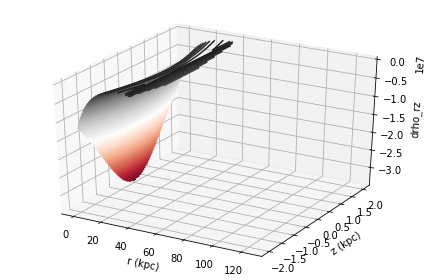

In [7]:
#Derivative of Disk Density Distribution (3D)
def drho_rz2(r, z):
    return durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

#Variables
zb = np.linspace(-2, 2, 500)
RB, ZB = np.meshgrid(ra, zb)
RZB = drho_rz2(RB, ZB)

#Plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RB, ZB, RZB, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('drho_rz');

In [8]:
#Complete Elliptic Integral
K = lambda r,u,xi: ellipk(px(r,u,xi)) - ellipe(px(r,u,xi))

print("At r=u=xi=1:",K(1,1,1))

At r=u=xi=1: 0.35734399698214614


At r=u=z=1: -8486222.452085793


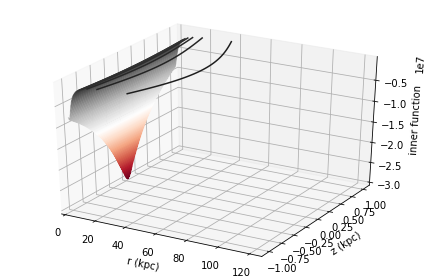

In [9]:
#Inner Function (3D)
f = lambda z,r,u: u*drho_rz(u, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

#Other necessary functions
#def f2(r, u, z):  #Same func as above with variables in a different order
#    return u*drho_rz(r, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

#Variables
RC, ZC = np.meshgrid(ra, za)
RZC = f(ZC, RC, 1)

#Plotting
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RC, ZC, RZC, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlim(0,125)
ax.set_xlabel('r (kpc)')
ax.set_ylabel('z (kpc)')
ax.set_zlabel('inner function');

#Print Desired Values
print("At r=u=z=1:",f(1,1,1))

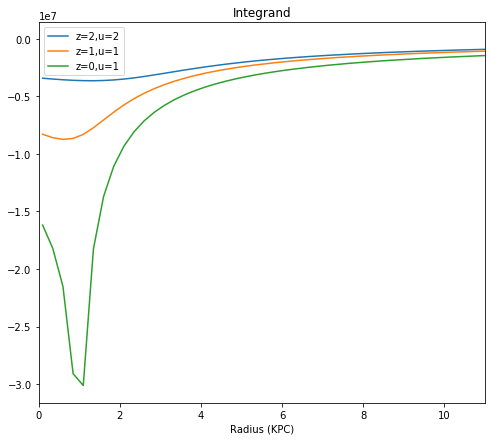

In [10]:
# Plot 
plt.figure(figsize=(8,7))
plt.plot(ra,f(2,ra,2), label="z=2,u=2")
plt.plot(ra,f(1,ra,1), label="z=1,u=1")
plt.plot(ra,f(0,ra,1), label="z=0,u=1")
plt.title("Integrand")
plt.xlabel("Radius (KPC)")
plt.xlim(0,11)
plt.legend()
plt.show()

In [11]:
#Integrate Function
intf = lambda u,r: quad(f, 0, np.inf, args=(r,u,))[0]

print("At r=u=1:",intf(1,1))

#integrate outer function
intintf = lambda r: nquad(intf, [[0.1, 125]], args=(r,),opts=[options,options])[0]

print("At r=10[kpc]:",intintf(10))

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


At r=u=1: -25163286.69048213
At r=10[kpc]: -238575958.71734738


In [12]:
#Mass of Disk
rho_rz_r = lambda z,r: rho_rz(r,z)*r
Mintrho = lambda r: quad(rho_rz_r, -125, 125, args=(r,))[0]
Mdblintrho = quad(Mintrho, 0, 125)[0]

#epsdisk = Mintintrho/L0
pref = epsdisk*(L0/Mdblintrho)

#multiplying by epsylon
F = lambda r: 4*np.pi*G*intintf(r)*pref
Fv = np.vectorize(F)

print("L0:",L0)
print("Mdblintrho:",Mdblintrho)
print("F at r=1[kpc]:",Fv(1))

L0: 37670379898.39093
Mdblintrho: 80061849225.77025


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


F at r=1[kpc]: nan


C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
No handles with labels found to put 

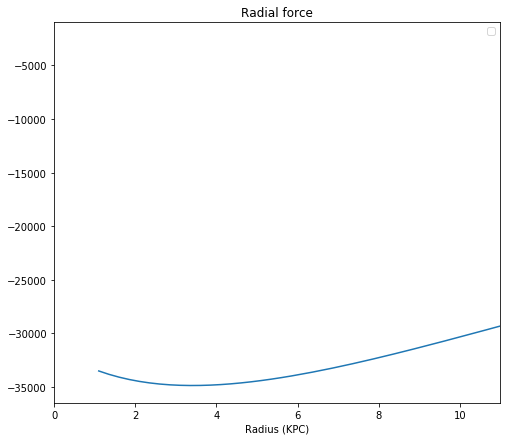

In [13]:
# Plot 
plt.figure(figsize=(8,7))
plt.plot(ra,Fv(ra))
plt.title("Radial force")
plt.xlabel("Radius (KPC)")
plt.xlim(0,11)
plt.legend()
plt.show()

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


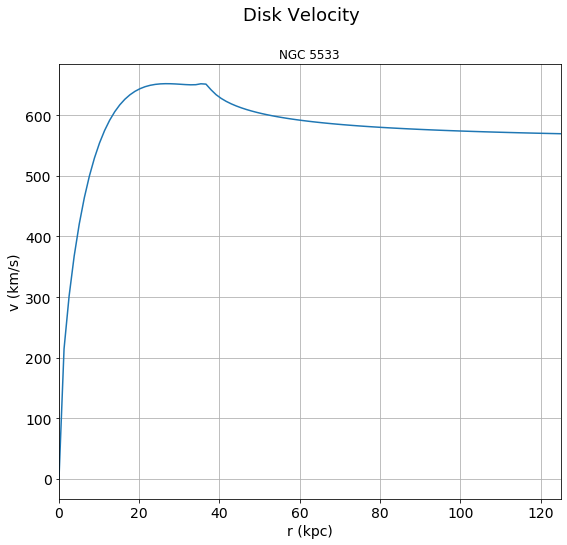

In [14]:
#Radial Force Function
#Disk Velocity

rd = np.linspace(0.1, 125, num=100)


############################Load/Save Disk Velocity#######################
hval = "h"+str(h)
try:
    saved = h5.File("inputs.hdf5","w")
except OSError:
    saved = h5.File("inputs.hdf5","r")
try:
    grp = saved.create_group("disk")
except ValueError:
    grp = saved["disk"]
try:                                                
    dset = grp[hval]
except KeyError: #calculate vd and save it for hval
    vd = np.sqrt(-rd*Fv(rd))
    vd[np.isnan(vd)] = 0
    grp.create_dataset(hval,data=vd)
##########################################################################

#plot disk velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

#Plotting
plt.plot(rd, vd, linestyle='solid', label='Disk Velocity')          

fig.suptitle('Disk Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,125)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.savefig('Outputs/DiskVelocity100pts.png')